<a href="https://colab.research.google.com/github/rajeshmore1/Decision-Tree-Boston-Housing-/blob/main/Rajesh_More_Assignment_Copy_of_M3W2D3_Assignment_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision trees are generally used for classification problems. But it can also be used for regression problems by grouping the dependent variable (continuous) into buckets. <code>DecisionTreeRegressor()</code> from the scikit-learn library helps us to use decision trees for regression problems. The implementation is similar to <code>DecisionTreeClassifier()</code>.

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>Here MEDV is the continuous dependent variable.

## Build a predictor for MEDV using decision tree algorithm.

## Measure the performance of the model using regression evaluation metrics.

In [4]:
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
working_dir_path = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 3/Week 1/Day 2/'
boston=pd.read_csv(working_dir_path + 'Boston Housing.csv')

In [11]:
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
boston.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
boston.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
boston.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [15]:
#So the feature chas is infact categorical. So we will try and convert it into categorical


boston['CHAS']=boston['CHAS'].astype(object)


In [16]:
boston.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 55.5+ KB


In [17]:
#Filling missing values
boston[['CRIM','ZN','INDUS','AGE','LSTAT']] = boston[['CRIM','ZN','INDUS','AGE','LSTAT']].fillna((boston[['CRIM','ZN','INDUS','AGE','LSTAT']].mean()))

In [18]:
boston['CHAS']=boston['CHAS'].fillna(method='bfill')

In [19]:
X=boston.iloc[:,0:-1]
Y=boston.iloc[:,-1]

In [20]:
X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [21]:
Y.head()


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [23]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=6)
DT_reg=regressor.fit(X_train, Y_train)

In [24]:
DT_reg

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [25]:
print(DT_reg.score(X_train,Y_train))
print(DT_reg.score(X_test,Y_test))

0.953927306484727
0.5651760244558232


In [26]:
Y_pred=DT_reg.predict(X_test)

In [27]:
Y_pred

array([23.86923077, 19.96875   , 19.96875   , 13.945     , 21.51129032,
       21.51129032, 21.51129032, 21.51129032, 21.51129032, 16.1       ,
        8.345     , 17.55      , 13.945     ,  8.345     , 48.5       ,
       33.87      , 21.51129032, 33.87      , 25.6375    , 21.51129032,
       23.86923077, 19.96875   , 19.96875   , 23.86923077, 21.51129032,
       10.9       , 19.96875   , 15.3       , 40.75      , 18.45294118,
       13.945     , 19.96875   , 19.96875   , 21.51129032, 19.96875   ,
       19.96875   ,  8.345     , 19.96875   , 13.945     , 17.55      ,
       21.51129032, 21.51129032, 21.51129032, 13.945     , 36.2       ,
       19.96875   , 19.63333333, 15.3       , 15.168     , 22.4       ,
       15.3       , 18.45294118, 21.51129032, 35.2       , 15.3       ,
       19.63333333, 21.51129032, 21.51129032, 10.9       , 19.63333333,
       23.86923077, 21.51129032, 33.87      , 25.6375    , 21.51129032,
       25.6375    , 18.45294118, 22.36      , 16.13333333, 21.51

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

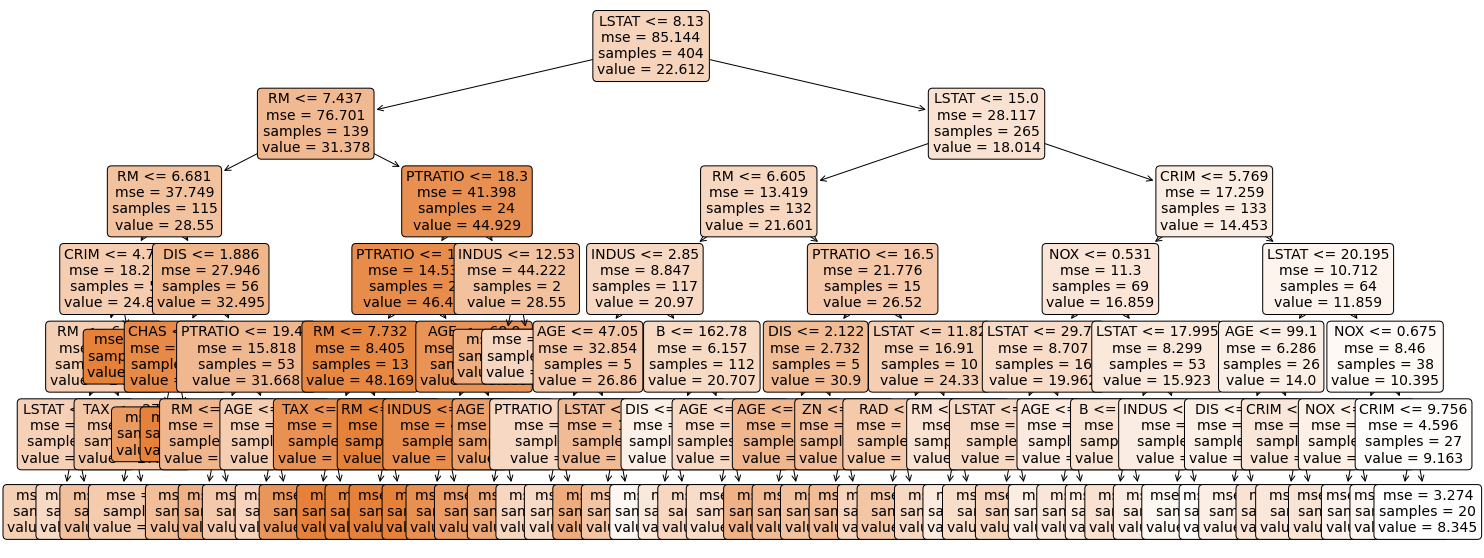

In [29]:
plt.figure(figsize=(25,10))
a = plot_tree(regressor, 
              feature_names=X.columns, 
              class_names=Y, 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [36]:
math.sqrt(mean_squared_error(Y_test, Y_pred))

5.950381298307847

In [37]:
r2_score(Y_test, Y_pred)

0.5651760244558232

In [42]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  

In [43]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)


In [44]:
print_metrics(Y_train, y_train_pred)

MSE is 3.9228005266078174
RMSE is 1.9806061008206093
RMSE is 0.9539273064847269
MAPE is 7.898520149489276


In [34]:
boston.iloc[-1]

CRIM         0.04741
ZN           0.00000
INDUS       11.93000
CHAS         0.00000
NOX          0.57300
RM           6.03000
AGE         80.80000
DIS          2.50500
RAD          1.00000
TAX        273.00000
PTRATIO     21.00000
B          396.90000
LSTAT        7.88000
MEDV        11.90000
Name: 505, dtype: float64